In [5]:
print('OM NAMO BHAGVATE VASUDEVAY')

OM NAMO BHAGVATE VASUDEVAY


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_csv(r"E:\uday\hospital_quality_EDA\HospInfo.csv")

In [8]:
data.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"


In [9]:
data.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [10]:
data.shape

(4812, 29)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4812 non-null   int64 
 1   Hospital Name                                                  4812 non-null   object
 2   Address                                                        4812 non-null   object
 3   City                                                           4812 non-null   object
 4   State                                                          4812 non-null   object
 5   ZIP Code                                                       4812 non-null   int64 
 6   County Name                                                    4797 non-null   object
 7   Phone Number                                                   4812 n

In [12]:
# choose first 10 columns for ease
df1=data.iloc[:,:10]


In [13]:
df1.head(2)


,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary


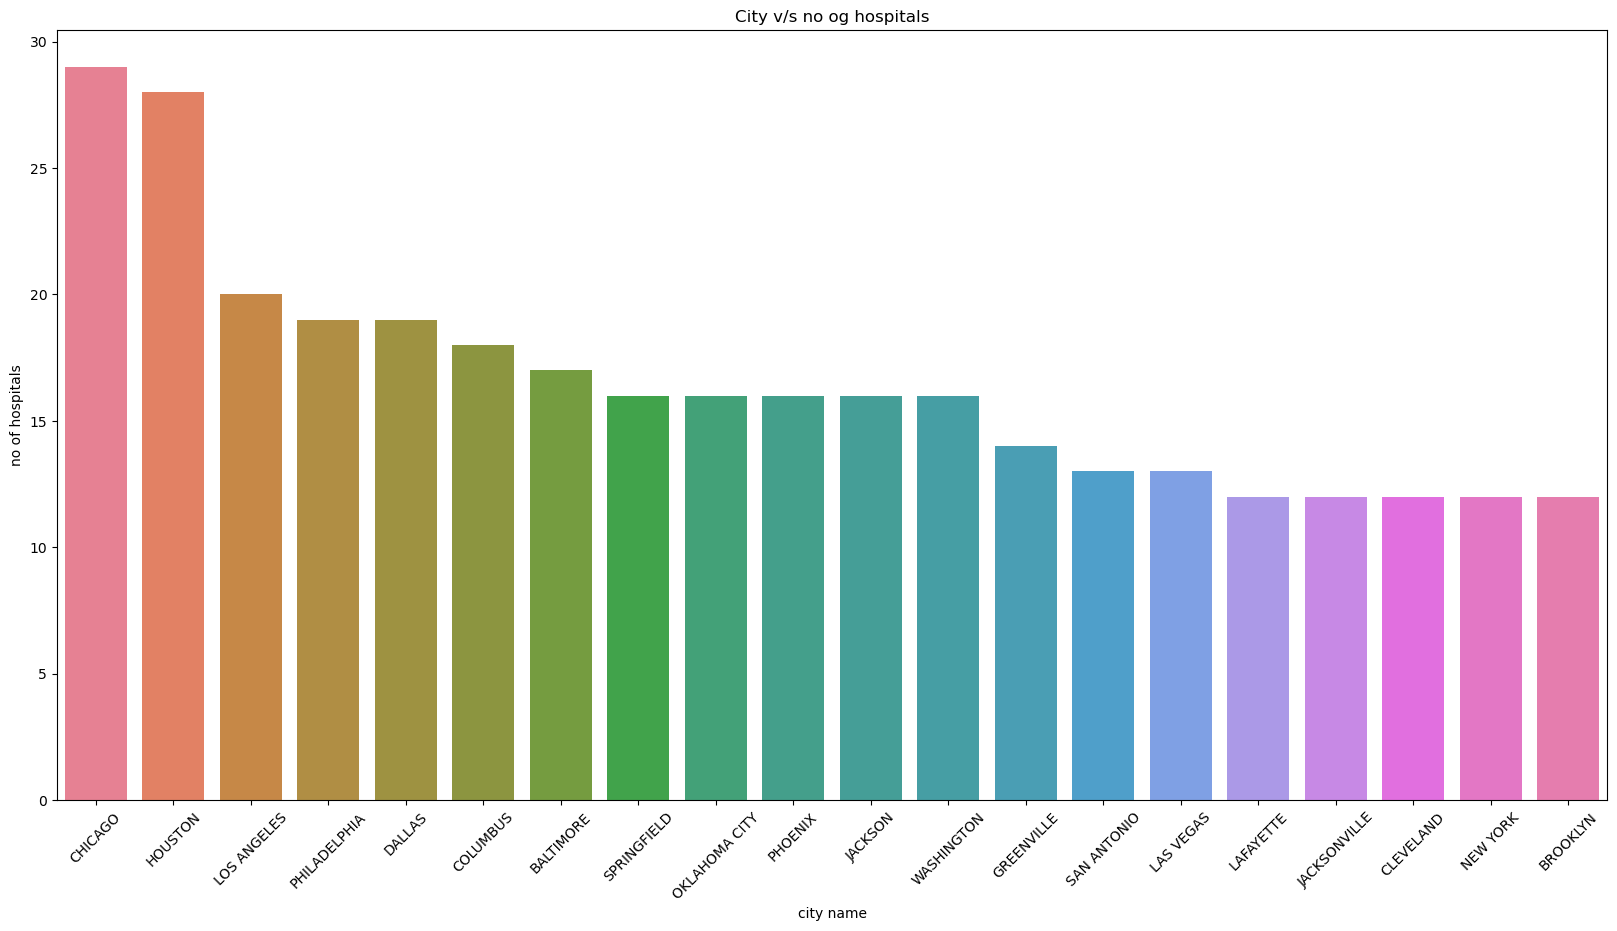

In [14]:
# check city v/s no of hospitals
top_20=df1.City.value_counts()[:20] # select top 20 city
plt.figure(figsize=(20,10))
sns.barplot(x=top_20.index,y=top_20.values,hue=top_20.index)
plt.title("City v/s no og hospitals")
plt.xlabel("city name")
plt.ylabel("no of hospitals")
plt.xticks(rotation=45)
plt.show()


findings
1.Chicago city have maximum no of hospitals followed by Housten.


Now we want to explore different types of hospitals in chicago.

In [17]:
df2=df1[['City','Hospital Type']]

In [18]:
df2[df2.City=='CHICAGO']['Hospital Type'].value_counts()
    
    

Hospital Type
Acute Care Hospitals    26
Childrens                3
Name: count, dtype: int64

In [19]:
def hospital_type_plot(df,city):
    idx=df[df.City==city]['Hospital Type'].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=idx.index,y=idx.values,hue=idx.index)
    plt.xlabel('Hospital type')
    plt.ylabel('No of hospitals')
    #plt.title('types of hospital in',city)
    plt.show()
    
    

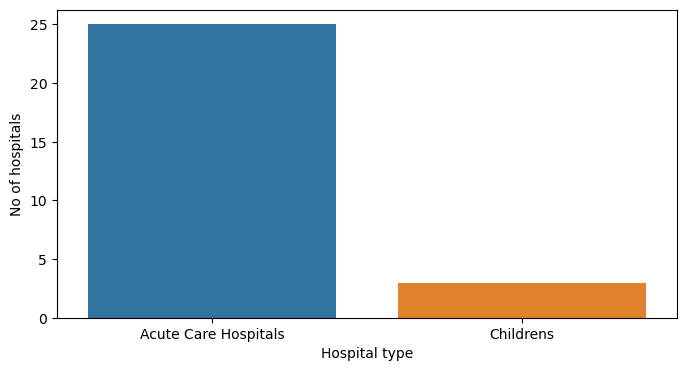

In [20]:
hospital_type_plot(df2,'HOUSTON')

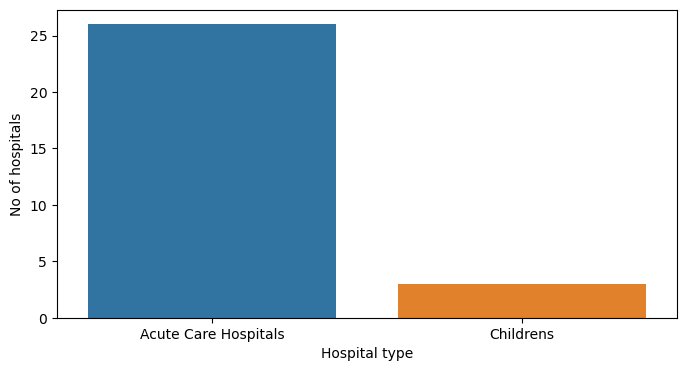

In [21]:
# Hospitals type details in chicago
hospital_type_plot(df2,'CHICAGO')

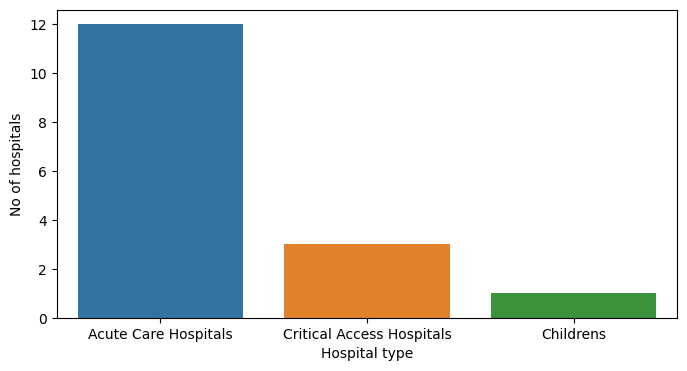

In [22]:
#washingoton
hospital_type_plot(df2,'WASHINGTON')

In [23]:
hw=df1['Hospital Ownership'].value_counts()

In [24]:
hw.values

array([2052,  800,  561,  462,  407,  343,   68,   65,   45,    9],
      dtype=int64)

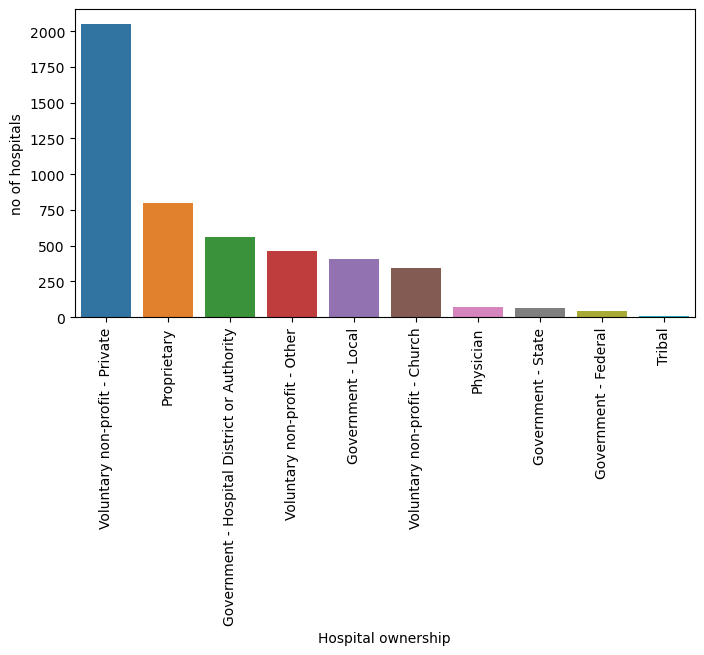

In [25]:
# Hospital ownership plot
plt.figure(figsize=(8,4))
sns.barplot(x=hw.index,y=hw.values,hue=hw.index)
plt.xlabel('Hospital ownership')
plt.ylabel('no of hospitals')
plt.xticks(rotation=90)
plt.show()


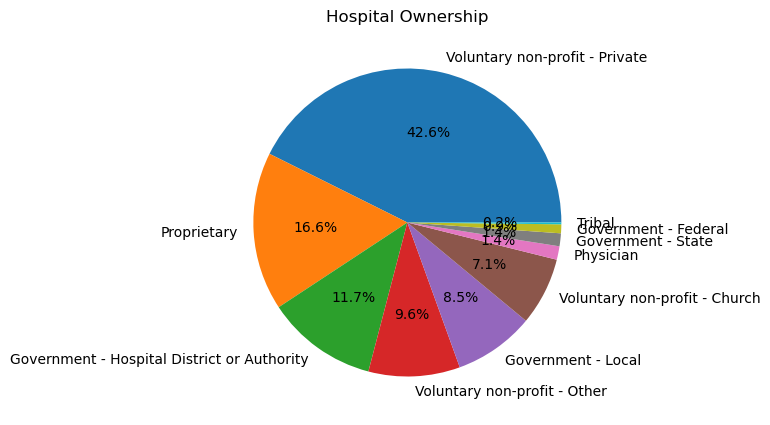

In [26]:
plt.figure(figsize=(5,5))
plt.pie(hw.values,labels=hw.index,autopct='%1.1f%%')
plt.title('Hospital Ownership')
plt.show()

Findings:
1. Goverment share is only 23% (Federal+state+district),in terms of no of hospital.

In [28]:
ht=data['Hospital Type'].value_counts()
ht

Hospital Type
Acute Care Hospitals         3369
Critical Access Hospitals    1344
Childrens                      99
Name: count, dtype: int64

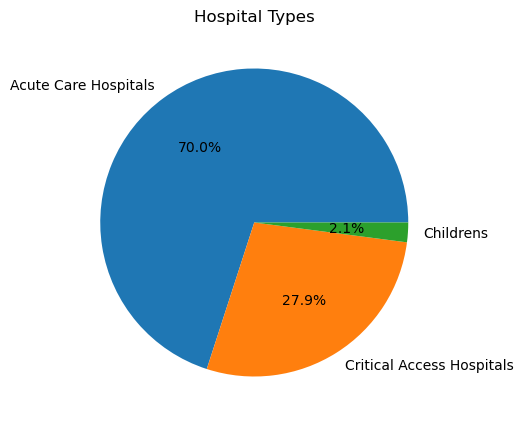

In [29]:
plt.figure(figsize=(5,5))
plt.pie(ht.values,labels=ht.index,autopct='%1.1f%%')
plt.title("Hospital Types")
plt.show()

In [30]:
data["Hospital overall rating"].value_counts()

Hospital overall rating
3                1761
Not Available    1245
4                 939
2                 678
1                 107
5                  82
Name: count, dtype: int64

let's find those hospital whose rating is equal or more than 3.

In [32]:
top_rated_H=data[data["Hospital overall rating"].isin(['3','4','5'])].reset_index(drop=True)

In [33]:
top_rated_H[['Hospital Name','City','State','Hospital overall rating','Hospital Ownership','Hospital Type']]

,Hospital Name,City,State,Hospital overall rating,Hospital Ownership,Hospital Type
0,MARSHALL MEDICAL CENTER SOUTH,BOAZ,AL,3,Government - Hospital District or Authority,Acute Care Hospitals
1,DEKALB REGIONAL MEDICAL CENTER,FORT PAYNE,AL,3,Proprietary,Acute Care Hospitals
2,WEDOWEE HOSPITAL,WEDOWEE,AL,4,Government - Hospital District or Authority,Acute Care Hospitals
3,CRESTWOOD MEDICAL CENTER,HUNTSVILLE,AL,3,Proprietary,Acute Care Hospitals
4,YUKON KUSKOKWIM DELTA REG HOSPITAL,BETHEL,AK,3,Tribal,Acute Care Hospitals
...,...,...,...,...,...,...
2777,VIRGINIA HOSPITAL CENTER,ARLINGTON,VA,4,Voluntary non-profit - Private,Acute Care Hospitals
2778,CLEAR LAKE REGIONAL MEDICAL CENTER,WEBSTER,TX,3,Proprietary,Acute Care Hospitals
2779,CARILION GILES COMMUNITY HOSPITAL,PEARISBURG,VA,4,Voluntary non-profit - Private,Critical Access Hospitals
2780,PLEASANT VALLEY HOSPITAL,POINT PLEASANT,WV,3,Voluntary non-profit - Private,Acute Care Hospitals


Now let's explore how many top rated hospitals are Goverment. 

In [35]:
t_ownership=top_rated_H['Hospital Ownership'].value_counts()
t_ownership

Hospital Ownership
Voluntary non-profit - Private                 1303
Proprietary                                     414
Voluntary non-profit - Other                    310
Government - Hospital District or Authority     270
Voluntary non-profit - Church                   249
Government - Local                              181
Government - State                               26
Physician                                        17
Government - Federal                             11
Tribal                                            1
Name: count, dtype: int64

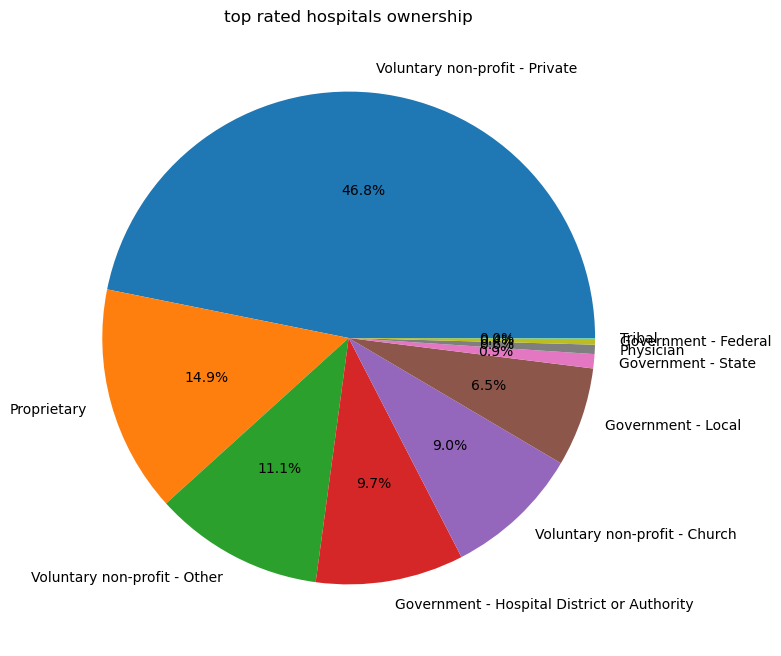

In [36]:
plt.figure(figsize=(8,8))
plt.pie(t_ownership.values,labels=t_ownership.index,autopct='%1.1f%%')
plt.title('top rated hospitals ownership')
plt.show()

Findings
1.voluntary non profin -private ownership hospitals have maximum share (46.8) in top rated hospitals(>3 rating)
2.All government hospitals (federal+state+dirtrict) have only 17% share. 

Now let's filter the hospital whose ratings is 5.

In [39]:
rated_5_H=top_rated_H[top_rated_H["Hospital overall rating"]=='5'][['Hospital Name','City','State','Hospital Ownership']]

In [40]:
rated_5=rated_5_H['Hospital Ownership'].value_counts()
rated_5

Hospital Ownership
Voluntary non-profit - Private                 37
Voluntary non-profit - Church                  14
Voluntary non-profit - Other                   10
Physician                                       7
Proprietary                                     7
Government - Hospital District or Authority     4
Government - Local                              2
Government - State                              1
Name: count, dtype: int64

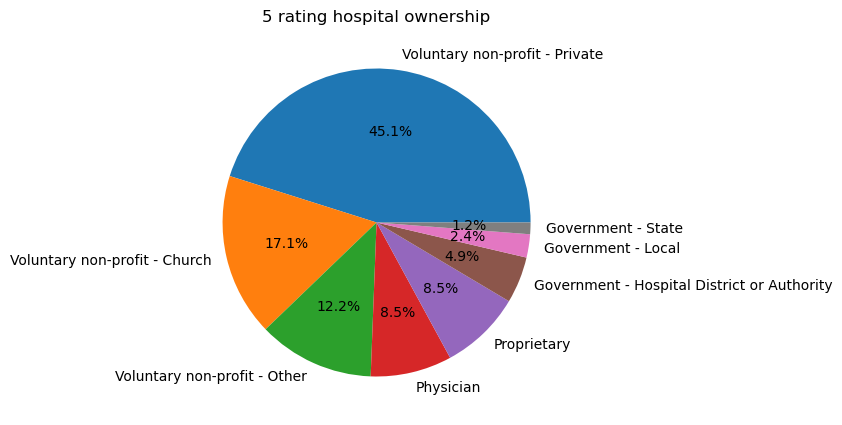

In [41]:
plt.figure(figsize=(5,5))
plt.pie(rated_5.values,labels=rated_5.index,autopct='%1.1f%%')
plt.title('5 rating hospital ownership')
plt.show()

Findings:
1. In 5 rating hospitals ,government hospital share is approx 8.5% only.

In [77]:
data["Mortality national comparison"].value_counts()

Mortality national comparison
Same as the national average    2719
Not Available                   1352
Above the national average       400
Below the national average       341
Name: count, dtype: int64

let's explore the hospitals where mortality rate is below national average

In [96]:
df=data[data["Mortality national comparison"]=='Below the national average'][['Hospital Name','City','Hospital Ownership','Hospital overall rating']]

In [98]:
df=df.reset_index(drop=True)

In [112]:
df['Hospital overall rating'].value_counts()

Hospital overall rating
3    149
2    136
1     28
4     28
Name: count, dtype: int64

In [102]:
df3=df['Hospital Ownership'].value_counts()
df3

Hospital Ownership
Voluntary non-profit - Private                 139
Proprietary                                     65
Voluntary non-profit - Church                   41
Government - Hospital District or Authority     40
Voluntary non-profit - Other                    31
Government - Local                              21
Government - State                               4
Name: count, dtype: int64

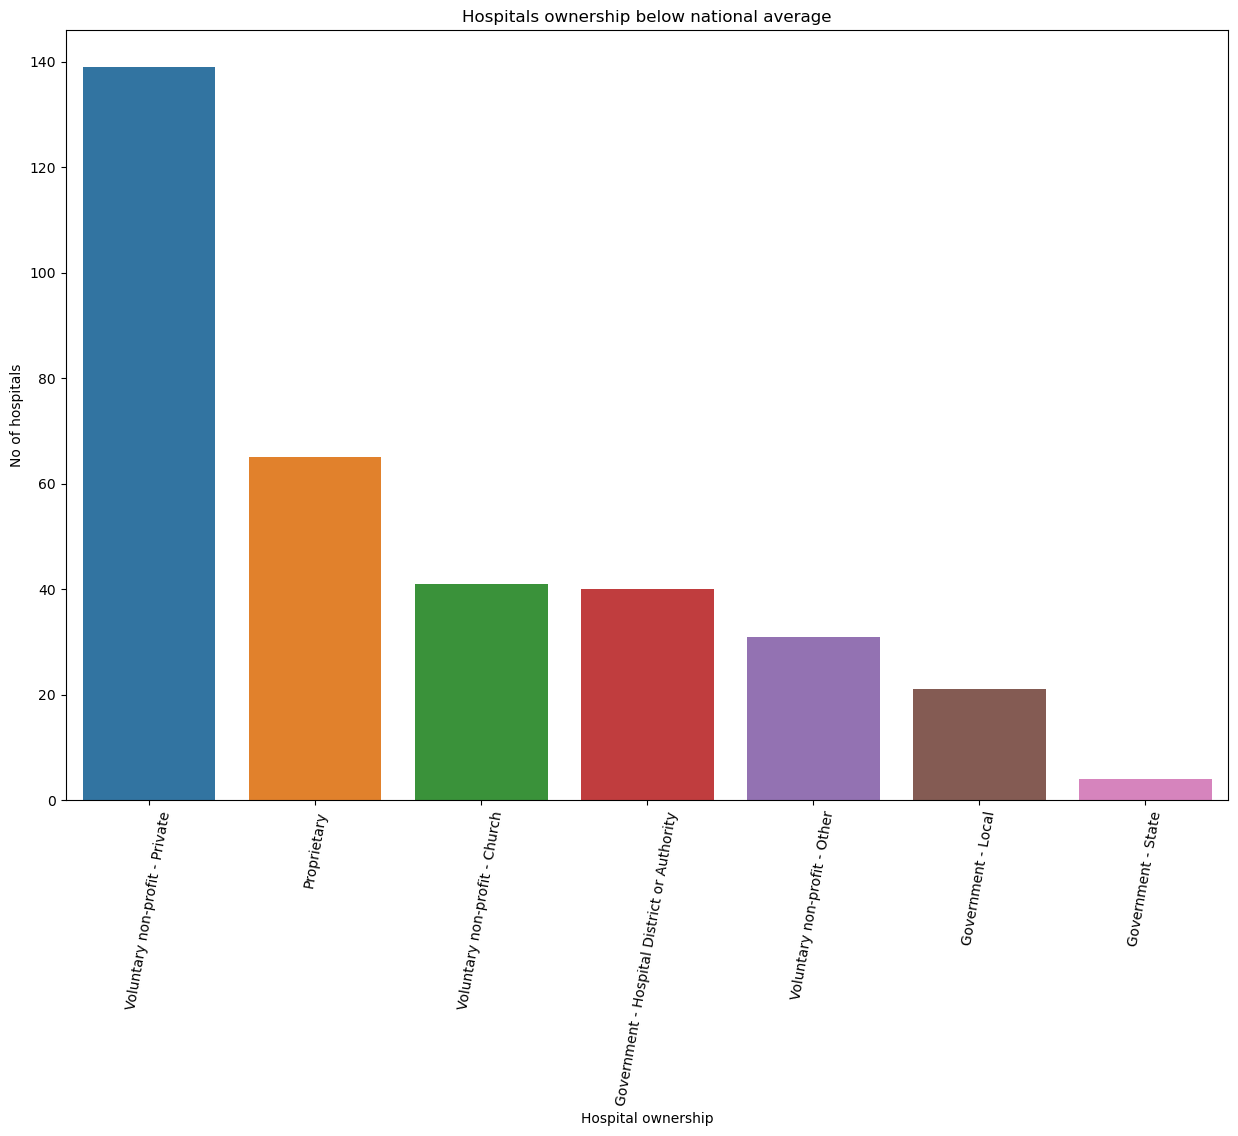

In [174]:
plt.figure(figsize=(15,10))
sns.barplot(x=df3.index,y=df3.values,hue=df3.index)
plt.title('Hospitals ownership below national average')
plt.xlabel('Hospital ownership')
plt.ylabel('No of hospitals')
plt.xticks(rotation=80)
plt.show()

In [156]:
df4=data[data["Mortality national comparison"]=='Above the national average'][['Hospital Name','City','Hospital Ownership','Hospital overall rating']]

In [158]:
df4=df4.reset_index(drop=True)

In [160]:
df4['Hospital overall rating'].value_counts()

Hospital overall rating
3    159
4    137
2     59
5     33
1     12
Name: count, dtype: int64

In [162]:
df5=df4['Hospital Ownership'].value_counts()
df5

Hospital Ownership
Voluntary non-profit - Private                 219
Proprietary                                     74
Voluntary non-profit - Church                   42
Voluntary non-profit - Other                    37
Government - Hospital District or Authority     13
Government - State                               5
Government - Local                               5
Physician                                        4
Government - Federal                             1
Name: count, dtype: int64

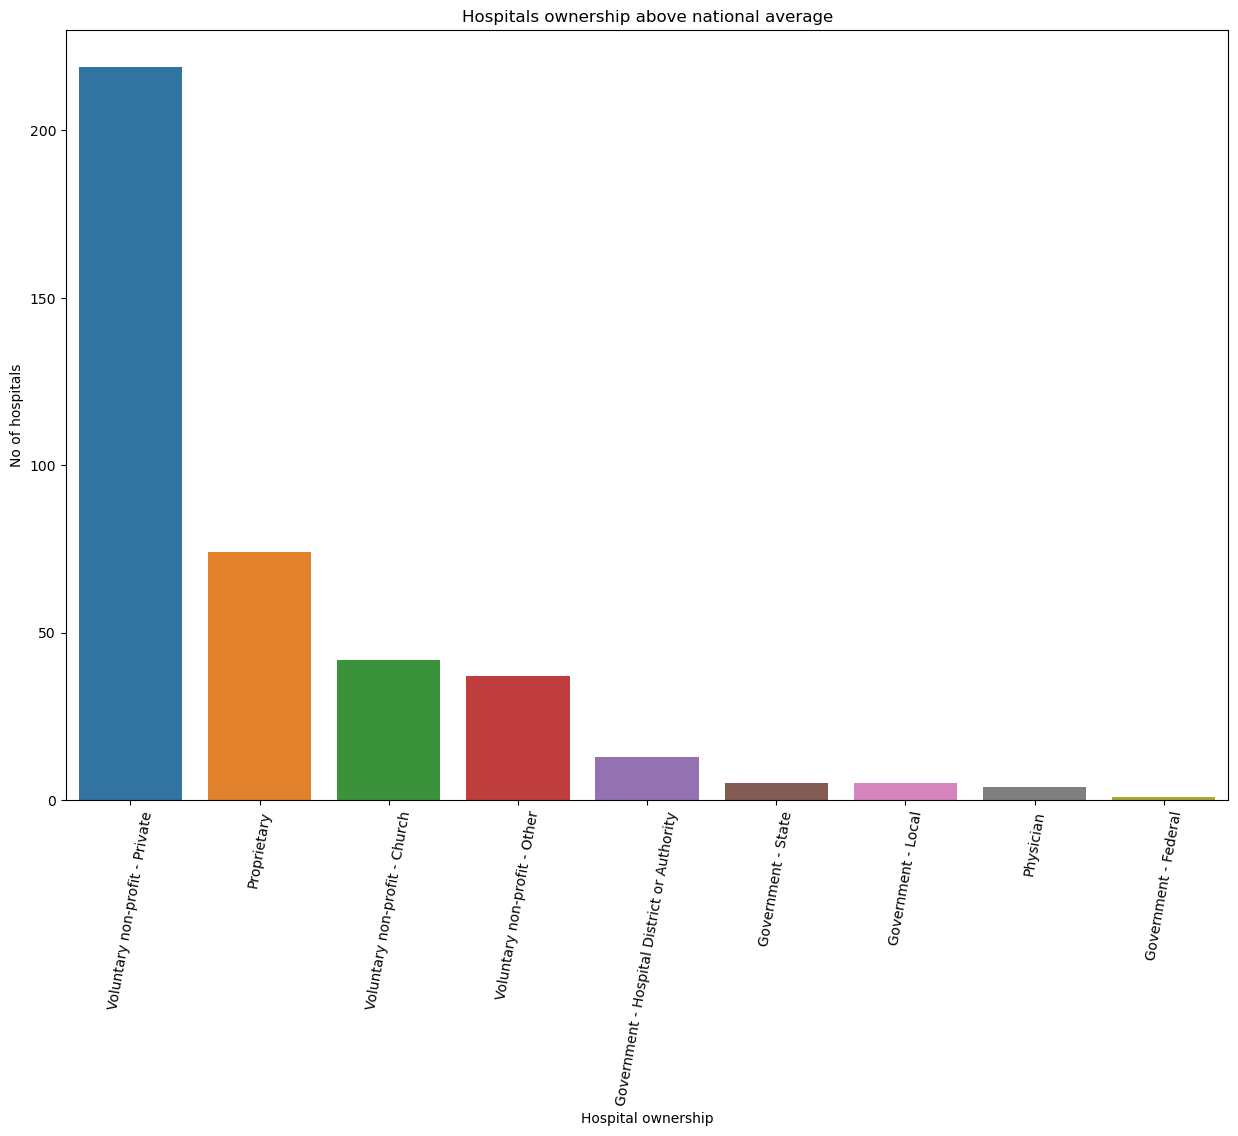

In [172]:
plt.figure(figsize=(15,10))
sns.barplot(x=df5.index,y=df5.values,hue=df5.index)
plt.title('Hospitals ownership above national average')
plt.xlabel('Hospital ownership')
plt.ylabel('No of hospitals')
plt.xticks(rotation=80)
plt.show()